# CAR DATA ANALYSIS

Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

Loading Dataset

In [2]:
df=pd.read_csv("/content/CAR DEKHO CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Exploring information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Row and Column count

In [4]:
df.shape

(4340, 8)

Numerical values ​​such as mean, standard deviation, minimum, maximum.

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Number of null values ​​in the dataset

In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Names of the columns

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<a id="4"></a>
# <p style="padding:10px;background-color:#27948b;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Visualization</p>

In [9]:
df.name_2.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: name_2, dtype: int64

The most common car model is Maruti

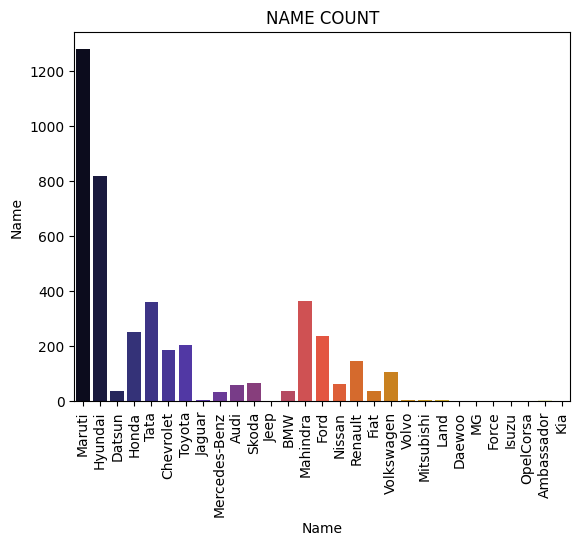

In [10]:
sns.countplot(data=df,x="name_2",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Name",fontsize=10,color="black")
plt.ylabel("Name",fontsize=10,color="black")
plt.title("NAME COUNT",color="black")
plt.show()

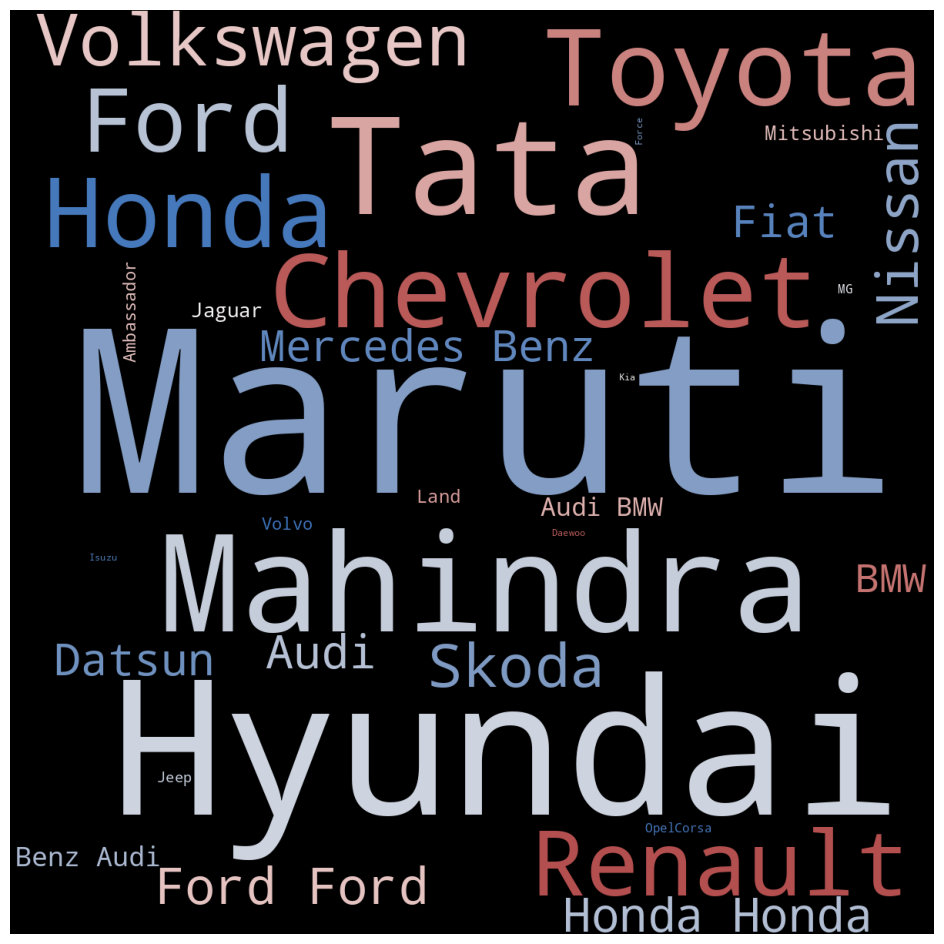

In [12]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['name_2'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

Year Count

In [13]:
df.year.value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

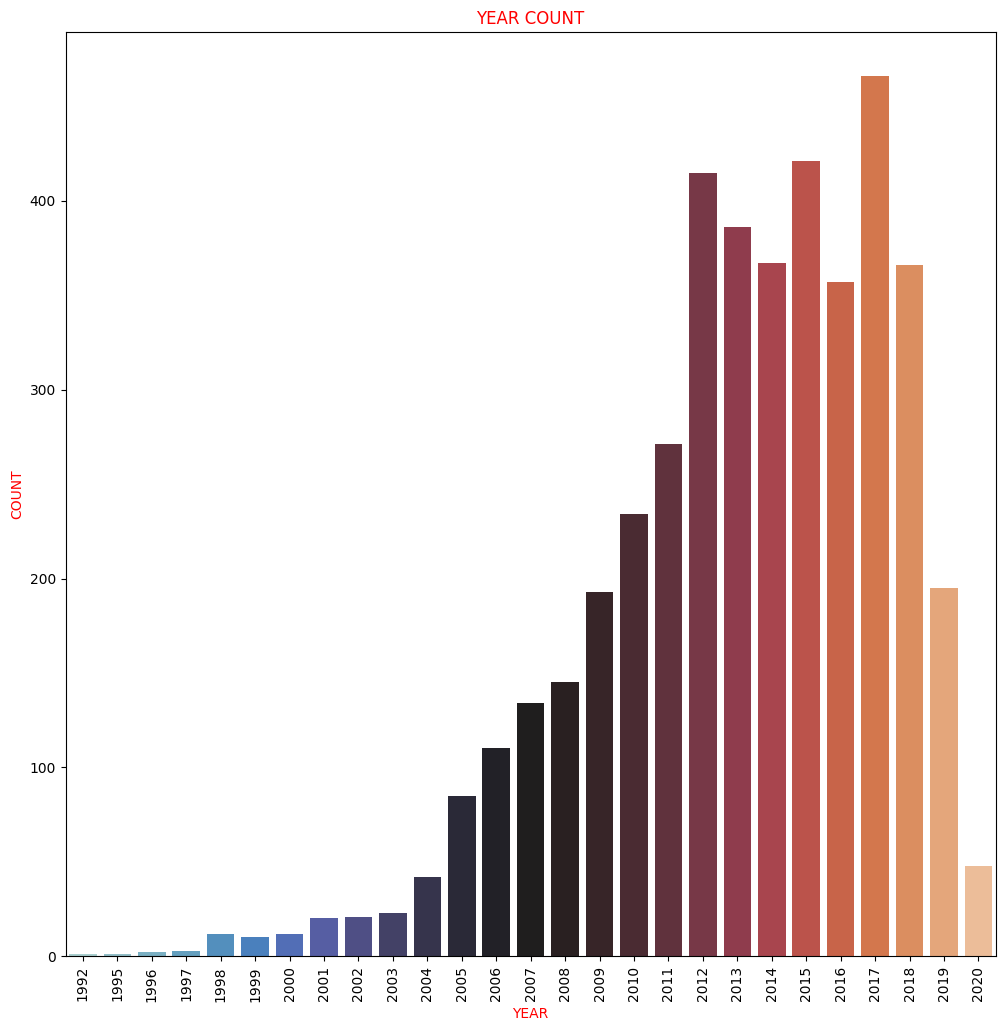

In [14]:
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=10,color="RED")
plt.ylabel("COUNT",fontsize=10,color="RED")
plt.title("YEAR COUNT",color="RED")
plt.show()

Fuel Count (Diseal is mostly used fuel)

In [16]:
df.fuel.value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

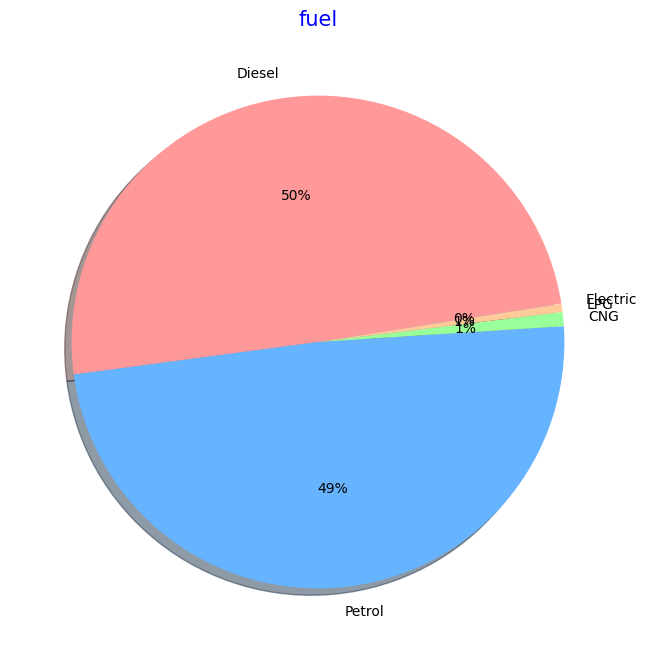

In [17]:
labels = df["fuel"].value_counts().index
sizes = df["fuel"].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"pink","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.f%%',colors=colors,shadow=True, startangle=9)
plt.title('fuel',color = 'blue',fontsize = 15)
plt.show()

Seller Type (Individual sales are the highest)

In [18]:
df.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

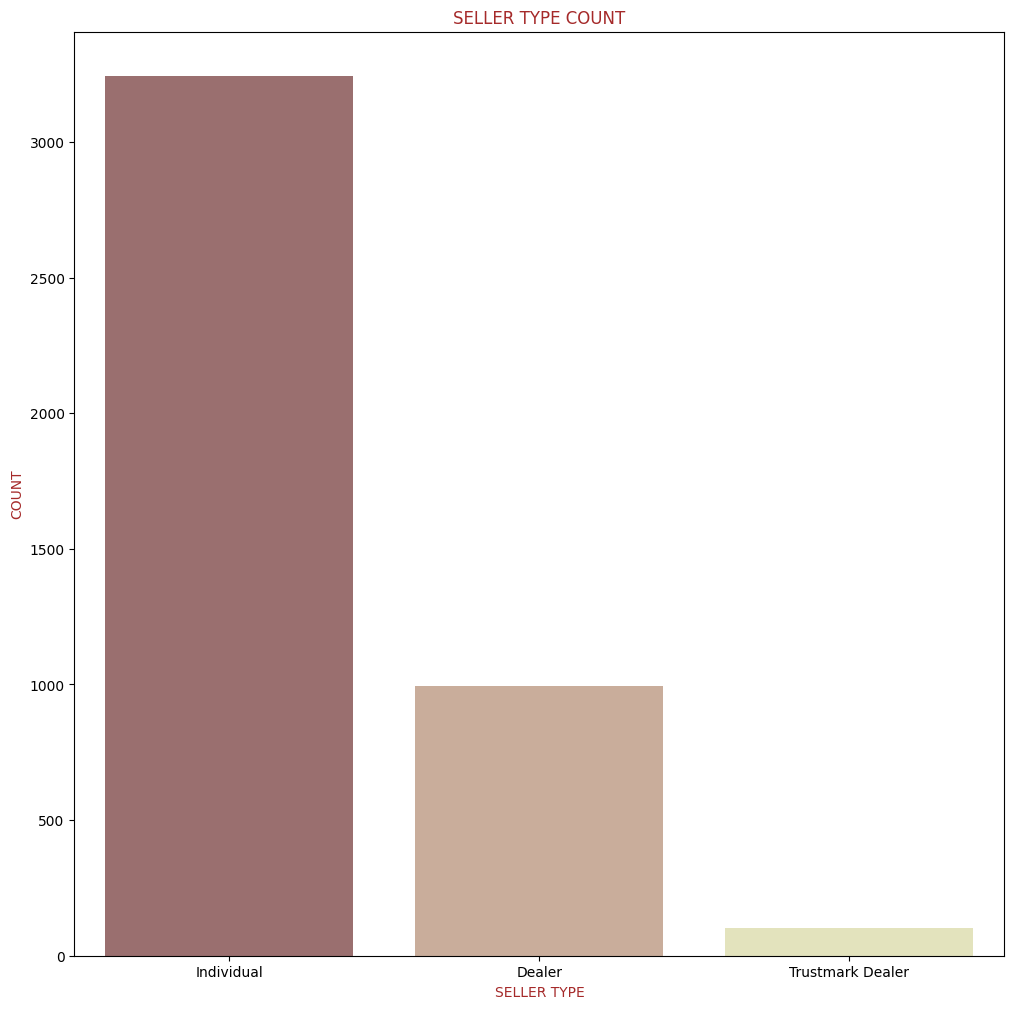

In [19]:
sns.countplot(data=df,x="seller_type",palette="pink")
plt.xlabel("SELLER TYPE",fontsize=10,color="brown")
plt.ylabel("COUNT",fontsize=10,color="brown")
plt.title("SELLER TYPE COUNT",color="brown")
plt.show()

Manual Cars vs Automatic Cars (Most are manual cars)

In [21]:
df.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

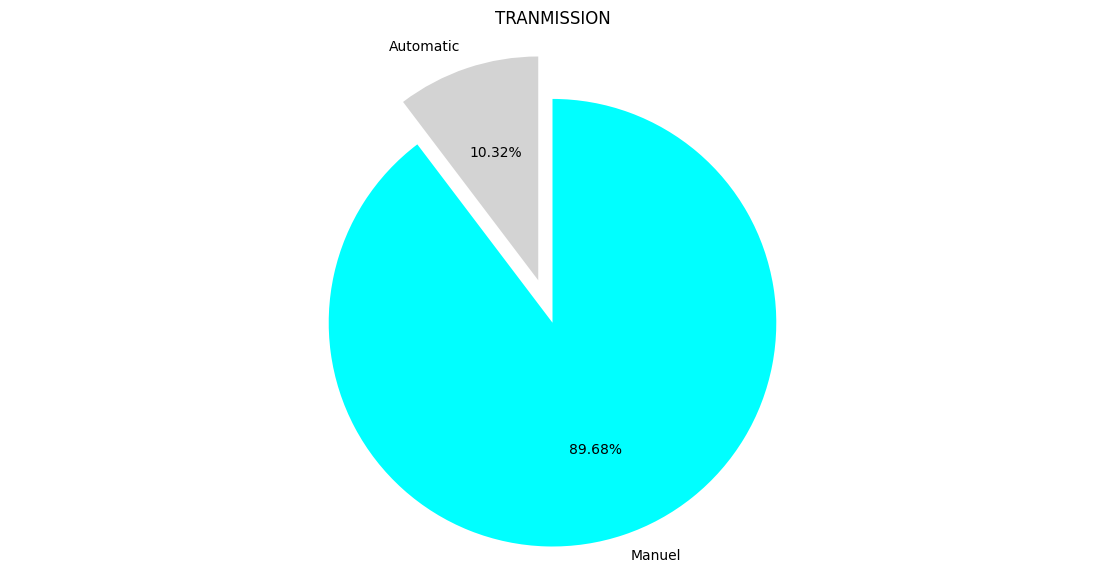

In [23]:
plt.figure(figsize=(14, 7))
labels=['Automatic', 'Manuel']
plt.pie(df['transmission'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightgray','cyan'], startangle=90)
plt.title('TRANMISSION')
plt.axis('equal')
plt.show()

Owner Count (Mostly cars are First owner)

In [24]:
df.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

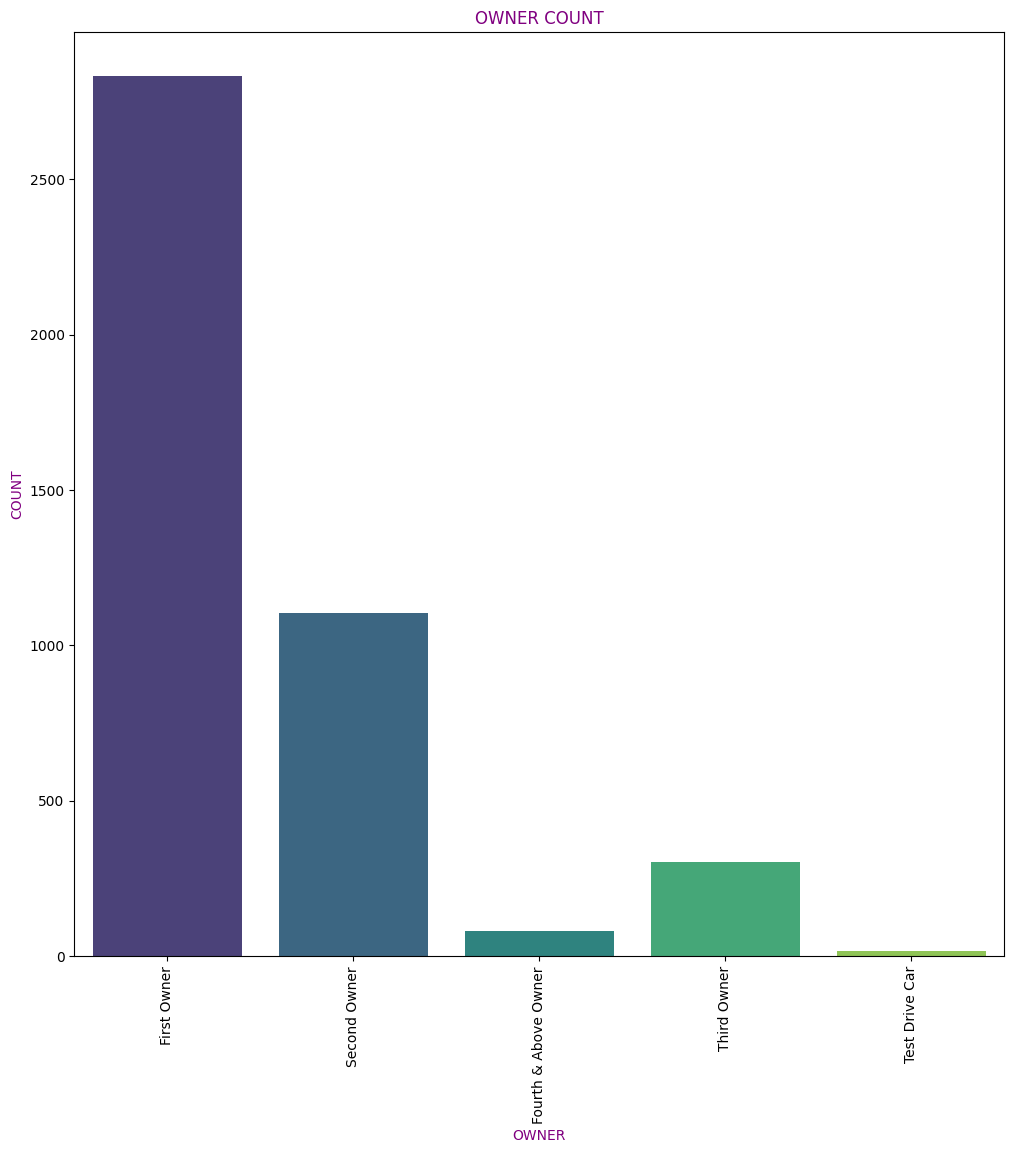

In [25]:
sns.countplot(data=df,x="owner",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("OWNER",fontsize=10,color="purple")
plt.ylabel("COUNT",fontsize=10,color="purple")
plt.title("OWNER COUNT",color="purple")
plt.show()

In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


Automatic and manual distribution of car models

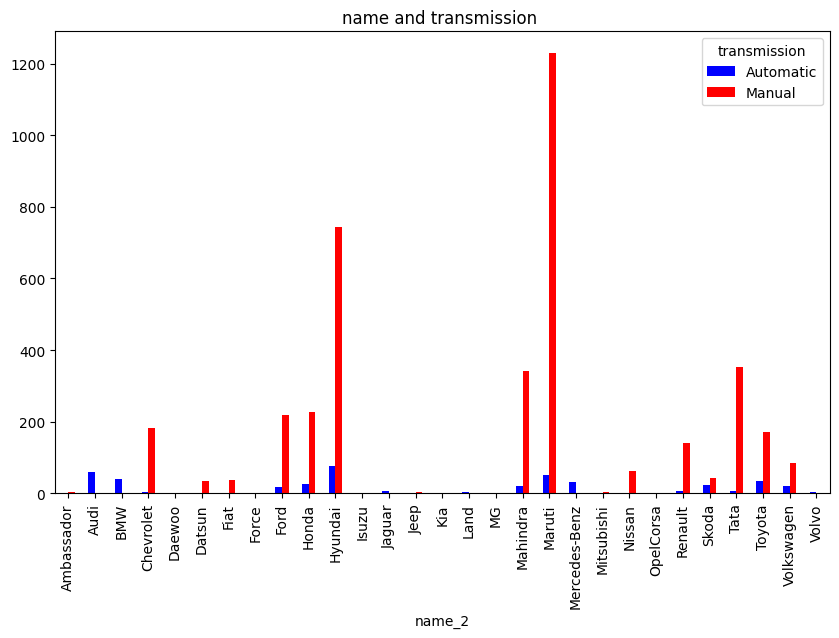

In [31]:
pd.crosstab(df["name_2"], df["transmission"]).plot(kind="bar", figsize=(10, 6), color=["blue","red"], title="name and transmission ")
plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#27948b;margin:0;color:#e7d954;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Result</p>

# The best selling car is the Maruti. Next comes Hyundai.
# Cars are usually manual.
# We can say that vehicles are generally sold first-hand, followed by second-hand vehicles.
# Most of the sales are made individually.
# Most sales were made in 2017.
# Based on these data, we can say that there was a lot of production in 2017.